In [5]:
# import necessary libraries

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math 

In [7]:
# getting data

In [8]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
df.shape

(21, 2)

In [11]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
# visualisation

In [13]:
# histogram

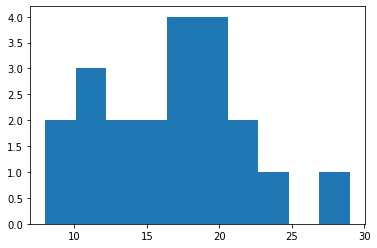

In [14]:
plt.hist(df['Delivery Time'])
plt.show()

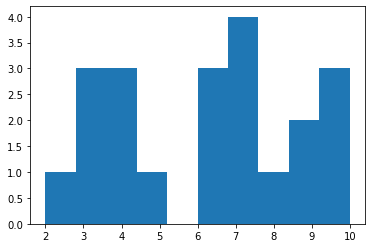

In [15]:
plt.hist(df['Sorting Time'])
plt.show()

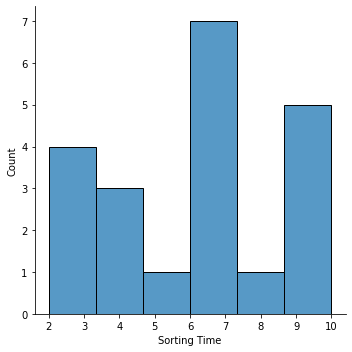

In [16]:
sns.displot(df['Sorting Time'])


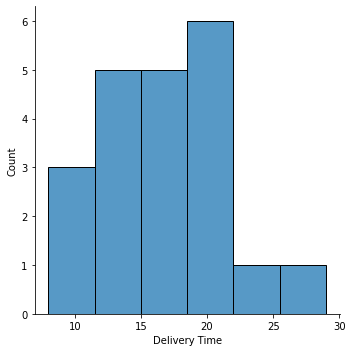

In [17]:
sns.displot(df['Delivery Time'])

In [18]:
# boxplot

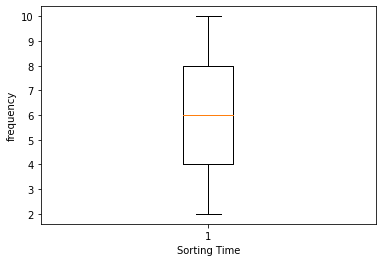

In [19]:
plt.boxplot(df['Sorting Time'])
plt.xlabel('Sorting Time')
plt.ylabel('frequency')
plt.show()

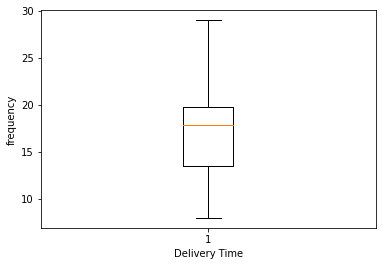

In [20]:
plt.boxplot(df['Delivery Time'])
plt.xlabel('Delivery Time')
plt.ylabel('frequency')
plt.show()

In [21]:
# distribution plot

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

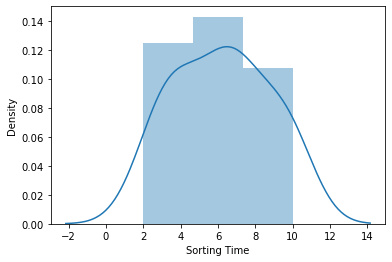

In [22]:
sns.distplot(df['Sorting Time'])

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

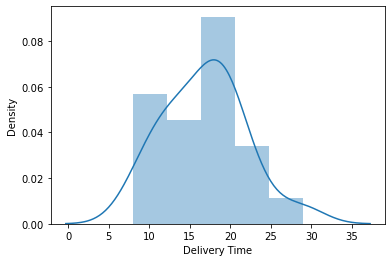

In [23]:
sns.distplot(df['Delivery Time'])

In [24]:
# scatter plot

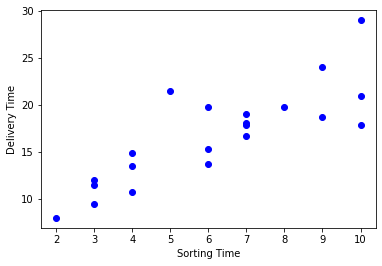

In [25]:
plt.plot(df['Sorting Time'],df['Delivery Time'] , 'bo')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [26]:
# Linear regression

In [27]:
x = df[['Sorting Time']]
y = df[['Delivery Time']]

In [28]:
import statsmodels.formula.api as smf
reg = smf.ols('y~x',data = df).fit()

In [29]:
# coefficients

In [30]:
coefficients=reg.params
coefficients

Intercept    6.582734
x            1.649020
dtype: float64

In [31]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        12:03:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# R-squared:0.682 [can be improved]
# df['Sorting Time'] =P>|t|:0.000 [Sorting Time is significant value to determine Delivery Time]
# degrees of freedom = (n-2) => 21=2=19

In [33]:
# residuals

In [34]:
residuals = reg.resid
residuals

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [35]:
# standardized residuals

In [36]:
std_resid = reg.resid_pearson
std_resid

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [37]:
# prediction of delivery time taking sorting time use the regression model developed

In [38]:
predict = reg.predict(x)

In [39]:
predict

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [40]:
# calculating mse and rmse values

In [84]:
mse = np.mean((np.array(y)-np.array(predict))**2)
mse

41.26310568497604

In [85]:
rmse = math.sqrt(mse)
rmse

6.423636484498172

In [43]:
# plotting best fit line 

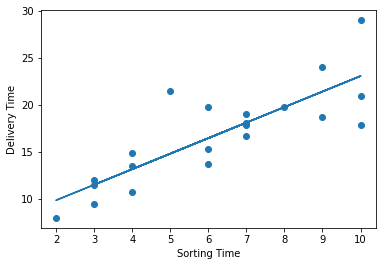

In [44]:
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.plot(df['Sorting Time'] ,predict)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [ ]:
rscore =

In [45]:
# applying log transformation to improve the model

In [46]:
reg_log =smf.ols('y~np.log(x)',data=df).fit()

In [47]:
coefficents_log = reg_log.params
coefficents_log

Intercept    1.159684
np.log(x)    9.043413
dtype: float64

In [48]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        12:03:06   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(x)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# R-squared:0.695 [ slightly increased compared to previous model]

In [50]:
# residuals

In [51]:
residuals_log = reg_log.resid
residuals_log

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [52]:
# standardisation of residuals

In [53]:
std_resid_log = reg_log.resid_pearson
std_resid_log

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [54]:
# prediction

In [55]:
predict_log = reg_log.predict(x)
predict_log

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [56]:
# calculating mse and rmse values

In [86]:
mse_log = np.mean((np.array(y)-np.array(predict_log))**2)
mse_log

41.58619091261164

In [88]:
rmse_log = math.sqrt(mse)
rmse_log 

6.423636484498172

In [59]:
# plotting

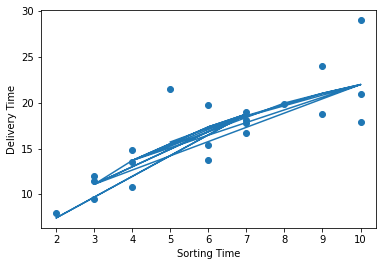

In [60]:
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.plot(df['Sorting Time'] ,predict_log)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [61]:
# applying exponential transformation to check for model improvement

In [62]:
reg_expo = smf.ols('y~np.exp(x)',data = df).fit()

In [63]:
reg_expo.params

Intercept    15.083578
np.exp(x)     0.000393
dtype: float64

In [64]:
reg_expo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00396
Time:                        12:03:07   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(x)      0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# R-squared:0.361 [worst model compared to previous model]

In [66]:
# applying sqrt transformation to check for model improvement

In [67]:
reg_sqrt = smf.ols('y~np.sqrt(x)',data=df).fit()

In [68]:
reg_sqrt.params

Intercept    -2.518837
np.sqrt(x)    7.936591
dtype: float64

In [69]:
reg_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        12:03:07   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(x)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# R-squared:0.696 improved compared to log transformation

In [71]:
# residuals

In [72]:
reg_sqrt_residuals = reg_sqrt.resid
reg_sqrt_residuals

0    -1.578867
1     0.145655
2     2.828239
3     2.709064
4     6.421133
5    -1.571761
6     0.520591
7    -1.727742
8    -4.678867
9    -2.540936
10   -0.099232
11   -2.604345
12   -1.799409
13    0.272258
14    0.802258
15    1.525655
16   -3.171761
17   -0.369409
18   -0.705198
19   -0.649409
20    6.272080
dtype: float64

In [73]:
# standard residuals

In [74]:
std_resid_sqrt =reg_sqrt.resid_pearson
std_resid_sqrt

array([-0.54979987,  0.05072065,  0.98486155,  0.94336205,  2.23599456,
       -0.54732539,  0.18128252, -0.60164169, -1.62929521, -0.88481554,
       -0.03455498, -0.90689618, -0.62659787,  0.09480692,  0.2793658 ,
        0.53127019, -1.10448427, -0.12863711, -0.24556697, -0.22613992,
        2.18409075])

In [75]:
# prediction

In [76]:
predict_sqrt = reg_sqrt.predict(x)
predict_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [77]:
# calculating mse and rmse values

In [89]:
mse_sqrt = np.mean((np.array(y)-np.array(predict_sqrt))**2)
mse_sqrt

41.59508892496467

In [90]:
rmse = math.sqrt(mse)
rmse

6.423636484498172

In [80]:
# plotting

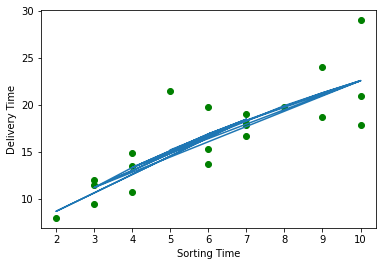

In [81]:
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'] ,color='green')
plt.plot(df['Sorting Time'] ,predict_sqrt)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [114]:
#R-squared:0.682,Adj. R-squared:0.666,AIC:106.7 with no transformation
#R-squared:0.361 ,Adj. R-squared:0.327,AIC:121.4 with expo transformation
#R-squared:	0.695,Adj.R-squared:0.679,AIC:105.8 of log transformation
#R-squared:0.696 ,Adj. R-squared:0.680,AIC:105.8 of sqrt transformation

comparing all tansformations , sqrt transformation is giving better accuracy